In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import math

pd.set_option('display.max_columns', None)  # Geen limiet op aantal kolommen
pd.set_option('display.width', 1000)        # Maak de 'virtuele' pagina heel breed
pd.set_option('display.max_colwidth', 50)   # Kort hele lange cel-inhoud (zoals die lijsten) iets in voor de leesbaarheid

In [61]:
#EuroTop  2018 6.9

#Constants

Dn50 = 0.04
g = 9.81

measuremenmt_time = 60*30

alpha_deg = np.degrees(np.arctan(4/3))
tan_alpha = np.tan(np.radians(alpha_deg))

toe_w = 0.083    
toe_h = 0.055         
toe_sh = 3            
toe_sv = 4

#Hydrodynamics

Hs = 0.11
Hs_range = np.append(np.linspace(0.6 * Hs, 1 * Hs, 3), np.linspace(1.1*Hs, 1.2*Hs, 2) )
print(Hs_range)
water_levels = np.array([0])
steepness = np.array([0.02, 0.04])

#Gemometry

chute_width = 0.1

crest_height = 0.47
berm_height = 0.37
berm_width = np.array([4*Dn50, 8*Dn50])

def Rc(water_levels, crest_height, berm_height):
    Rc = crest_height - (berm_height + water_levels)
    return Rc

Rc = Rc(water_levels, crest_height, berm_height)

print(Rc/Hs_range)

[0.066 0.088 0.11  0.121 0.132]
[1.51515152 1.13636364 0.90909091 0.82644628 0.75757576]


In [62]:
def q_gamma_bb(Hm0, Rc, sm, berm_width, g=9.81):
    gamma_BB = 0.68 - 4.1 * sm - 0.05 * berm_width / Hm0
    denom = Hm0 * gamma_BB
    exponent = -((1.5 * Rc / denom) ** 1.3)
    q_star = 0.09 * math.exp(exponent)
    
    return q_star

def q_gamma_f(Hm0, Rc, gamma_f= 0.44, g=9.81):
    denom = Hm0 * gamma_f
    exponent = -((1.5 * Rc / denom) ** 1.3)
    q_star = 0.09 * math.exp(exponent)
    return q_star



In [63]:
import pandas as pd
import numpy as np

# --- Table 1: using q_gamma_bb ---
# Iterating: Water Level -> Hs -> Steepness -> Berm Width
data_bb = []

for wl in water_levels:
    # Calculate dimensional Rc (m) for the function input
    rc_m = crest_height - (berm_height + wl)
    
    for val_hs in Hs_range:
        for sm in steepness:
            for bw in berm_width:
                # Calculate q_star using your function
                # Note: Passing val_hs as Hm0
                q_val = q_gamma_bb(val_hs, rc_m, sm, bw)
                
                # Optional: Calculate actual discharge q (m^3/s/m)
                # q = q_star * sqrt(g * Hm0^3)
                q_actual = q_val * np.sqrt(g * val_hs**3)
                volume = q_actual * chute_width * measuremenmt_time
                data_bb.append({
                    'Water_Level': wl,
                    'Rc_m': round(rc_m, 3),
                    'Hs': round(val_hs, 4),
                    'Steepness': sm,
                    'Berm_Width': bw,
                    'q_star': q_val,
                    'q_discharge': q_actual, 
                    'volume': volume
                })

df_gamma_bb = pd.DataFrame(data_bb)

data_f = []
# --- Table 2: using q_gamma_f ---
# Iterating: Water Level -> Hs
# (Steepness and Berm Width are not inputs for this formula)
for wl in water_levels:
    # Calculate dimensional Rc (m) for the function input
    rc_m = crest_height - (berm_height + wl)
    
    for val_hs in Hs_range:
        for sm in steepness:
            for bw in berm_width:
                # Calculate q_star using your function
                # Note: Passing val_hs as Hm0
                q_val = q_gamma_f(val_hs, rc_m)
                
                # Optional: Calculate actual discharge q (m^3/s/m)
                # q = q_star * sqrt(g * Hm0^3)
                q_actual = q_val * np.sqrt(g * val_hs**3)
                volume = q_actual * chute_width * measuremenmt_time
                data_f.append({
                    'Water_Level': wl,
                    'Rc_m': round(rc_m, 3),
                    'Hs': round(val_hs, 4),
                    'Steepness': sm,
                    'Berm_Width': bw,
                    'q_star': q_val,
                    'q_discharge': q_actual, 
                    'volume': volume
                })

df_gamma_f = pd.DataFrame(data_f)
# --- Display Results ---
# df_sorted_max = df_gamma_bb.sort_values(by='volume', ascending=False)
# print(df_sorted_max.head(10))


df_sorted_max2 = df_gamma_f.sort_values(by='volume')
print(df_sorted_max2.head(10))
# df_gamma_bb.to_excel('gamma_bb_results.xlsx', index=False)

# print("\n--- Table 2 (Gamma F) Head ---")
# print(df_gamma_f)

   Water_Level  Rc_m     Hs  Steepness  Berm_Width    q_star  q_discharge    volume
0            0   0.1  0.066       0.02        0.16  0.000019     0.000001  0.000183
1            0   0.1  0.066       0.02        0.32  0.000019     0.000001  0.000183
2            0   0.1  0.066       0.04        0.16  0.000019     0.000001  0.000183
3            0   0.1  0.066       0.04        0.32  0.000019     0.000001  0.000183
4            0   0.1  0.088       0.02        0.16  0.000268     0.000022  0.003948
5            0   0.1  0.088       0.02        0.32  0.000268     0.000022  0.003948
6            0   0.1  0.088       0.04        0.16  0.000268     0.000022  0.003948
7            0   0.1  0.088       0.04        0.32  0.000268     0.000022  0.003948
8            0   0.1  0.110       0.02        0.16  0.001160     0.000133  0.023861
9            0   0.1  0.110       0.02        0.32  0.001160     0.000133  0.023861


<>:84: SyntaxWarning: invalid escape sequence '\g'
<>:84: SyntaxWarning: invalid escape sequence '\g'
C:\Users\929952\AppData\Local\Temp\ipykernel_1344\4059401912.py:84: SyntaxWarning: invalid escape sequence '\g'
  ax1.set_title('Formula 1: Varying $\gamma_{BB}$ (Steepness & Berm Width)')


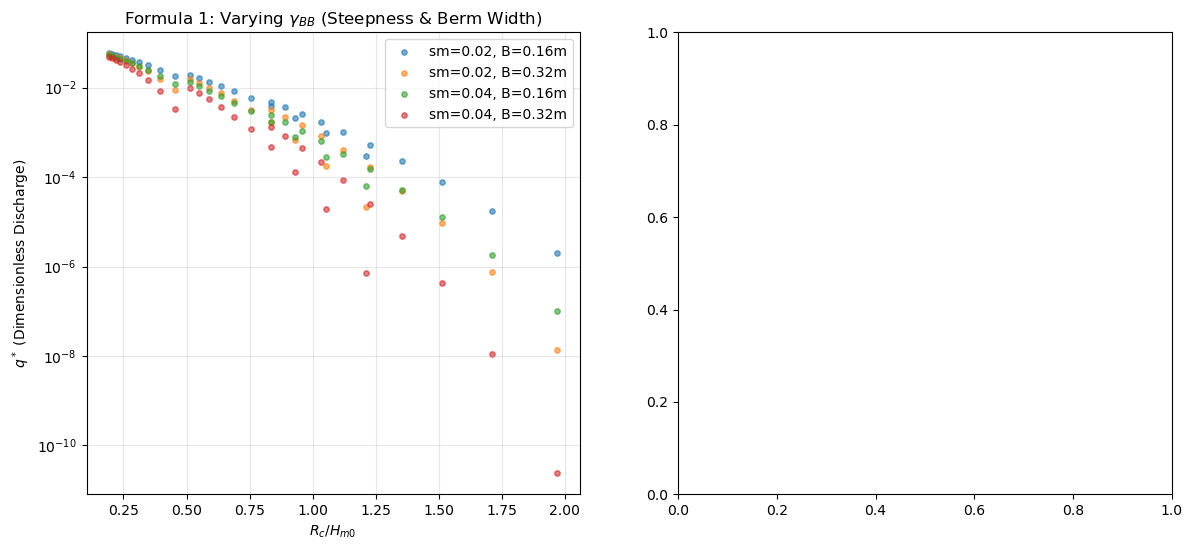

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import math

# --- 2. Define the Formulas ---

def get_q_star_gamma_bb(Hm0, Rc, sm, berm_width):
    # Calculate influence factor gamma_bb
    # Formula: gamma_b = 0.68 - 4.1*sm - 0.05*(B/Hm0)
    gamma_BB = 0.68 - 4.1 * sm - 0.05 * berm_width / Hm0
    
    # Safety check: gamma_bb should physically not be <= 0 for this formula to work
    if gamma_BB <= 0.001: return np.nan
    
    # Calculate dimensionless discharge
    denom = Hm0 * gamma_BB
    val_inside = 1.5 * Rc / denom
    
    # Safety check for negative base in power function
    if val_inside < 0: return np.nan
        
    q_star = 0.09 * np.exp(-(val_inside ** 1.3))
    return q_star

def get_q_star_gamma_f(Hm0, Rc, gamma_f=0.44):
    denom = Hm0 * gamma_f
    val_inside = 1.5 * Rc / denom
    
    if val_inside < 0: return np.nan
    
    q_star = 0.09 * np.exp(-(val_inside ** 1.3))
    return q_star

# --- 3. Collect Data for Plotting ---

# -- Data for Graph 1 (Gamma BB) --
# We will organize data by "Scenario" (combination of steepness and berm width)
scenarios_bb = {} # Key: Label, Value: (x_list, y_list)

for sm in steepness_range:
    for bw in berm_widths:
        label = f"sm={sm}, B={bw:.2f}m"
        x_vals = []
        y_vals = []
        
        for wl in water_levels:
            Rc_dim = crest_height - (berm_height + wl)
            for hm0 in Hs_range:
                # X-axis: Rc / Hm0
                x = Rc_dim / hm0
                # Y-axis: q*
                y = get_q_star_gamma_bb(hm0, Rc_dim, sm, bw)
                
                if not np.isnan(y):
                    x_vals.append(x)
                    y_vals.append(y)
        
        scenarios_bb[label] = (x_vals, y_vals)

# -- Data for Graph 2 (Gamma f) --
x_vals_f = []
y_vals_f = []

for wl in water_levels:
    Rc_dim = crest_height - (berm_height + wl)
    for hm0 in Hs_range:
        x = Rc_dim / hm0
        y = get_q_star_gamma_f(hm0, Rc_dim)
        
        if not np.isnan(y):
            x_vals_f.append(x)
            y_vals_f.append(y)

# --- 4. Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Gamma BB
for label, (x, y) in scenarios_bb.items():
    ax1.scatter(x, y, label=label, alpha=0.6, s=15)

ax1.set_yscale('log')
ax1.set_xlabel(r'$R_c / H_{m0}$')
ax1.set_ylabel(r'$q^*$ (Dimensionless Discharge)')
ax1.set_title('Formula 1: Varying $\gamma_{BB}$ (Steepness & Berm Width)')
ax1.grid(True, which="both", ls="-", alpha=0.3)
ax1.legend()



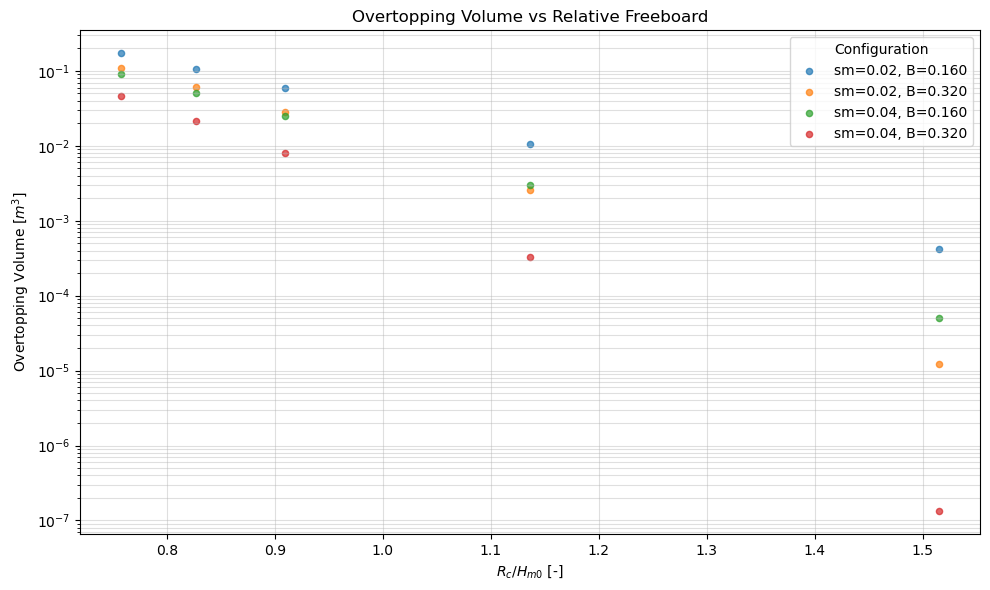

In [65]:
import matplotlib.pyplot as plt

# 1. Calculate the X-axis value (Rc / Hm0)
df_gamma_bb['Rc_Hs'] = df_gamma_bb['Rc_m'] / df_gamma_bb['Hs']

# 2. Create a 'Label' column for the legend (combining Steepness and Berm Width)
df_gamma_bb['Label'] = df_gamma_bb.apply(
    lambda row: f"sm={row['Steepness']}, B={row['Berm_Width']:.3f}", axis=1
)

# 3. Plotting
plt.figure(figsize=(10, 6))

# Group by the label so we get a legend for each configuration
for label, group in df_gamma_bb.groupby('Label'):
    plt.scatter(
        group['Rc_Hs'], 
        group['volume'], 
        label=label, 
        alpha=0.7, 
        s=20
    )

plt.yscale('log')  # Logarithmic scale for Volume
plt.xlabel(r'$R_c / H_{m0}$ [-]')
plt.ylabel(r'Overtopping Volume [$m^3$]')
plt.title('Overtopping Volume vs Relative Freeboard')
plt.grid(True, which="both", ls="-", alpha=0.4)
plt.legend(title="Configuration")
plt.tight_layout()

# Save or show
plt.savefig('overtopping_volume_plot.png')
plt.show()